# Avaliação 1
## FSC5705 - Física Computacional
## Data de entrega: 17/02/2021

Vamos testar as suas habilidades com Python e gráficos em matplotlib. O seu trabalho é preencher as células que contêm

```
# YOUR CODE HERE
raise NotImplementedError()
```

pelo código necessário para calcular o que a questão pede.

### Questão 1 (2 pontos)
Calcule a soma dos 100 primeiros números inteiros de forma iterativa, usando um laço `for` ou `while`. Faça um `print()` do resultado no final.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
Nums = np.arange(1,101)
total_sum = 0
for n_i in Nums:
    total_sum += n_i
print('Soma: ',total_sum)    

Soma:  5050


### Questão 2 (3 pontos)
Calcule (e imprima) o valor aproximado de $\pi$, usando os $N$ primeiros termos da série

$$
\frac{\pi^2}{6} = \frac{1}{1^2} + \frac{1}{2^2} + \frac{1}{3^2} + \frac{1}{4^2} + \ldots
$$

Estime e imprima o erro relativo em relação ao valor assintótico (usando a constante `np.pi`), para $N = 10, 100$ e $1000$. Para cada $N$, imprima uma linha com os valores: $N$, $\pi$ calculado, erro relativo.

Dica 1: crie primeiro uma função `calcula_pi(N)`, onde `N` é o número de termos da série.

Dica 2: se você vai usar a função `range()`, note que `range(1, 50)` vai de 1 a 49. Para iterar de `A` até `B`, inclusive, é preciso fazer `range(A, B + 1)`.

Dica 3: O erro relativo é calculado como no laboratório de Física:

$$
E[\%] = \frac{\mathrm{numérico} - \mathrm{analítico}}{\mathrm{analítico}} \times 100\,\%.
$$

In [6]:
def estimate_pi(N):
    series_sum = 0
    for series_term in np.arange(1,N+1):
        series_sum += 1/(series_term**2)
    return np.sqrt(6*series_sum) 

for n in (10,100,1000):
    estimate = estimate_pi(n)
    error = 100*(estimate-np.pi)/np.pi
    print("N: {},  Estimate: {}, Error: {} %".format(n,estimate,error))

N: 10,  Estimate: 3.04936163598207, Error: -2.9358044717329577 %
N: 100,  Estimate: 3.1320765318091053, Error: -0.30290756409218367 %
N: 1000,  Estimate: 3.1406380562059946, Error: -0.03038577845882608 %


### Questão 3 (2 pontos)

As funções $f(x)$ e $g(x)$ foram calculadas abaixo para uma amostra $x$. Faça o gráfico destas funções em dois subplots, um acima do outro. Escreva as etiquetas nos eixos x e y.

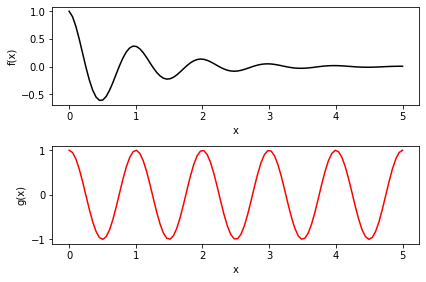

In [4]:
x = np.linspace(0.0, 5.0, 100)

f = np.cos(2 * np.pi * x) * np.exp(-x)
g = np.cos(2 * np.pi * x)

fig, axes = plt.subplots(nrows=2, ncols=1)
axes[0].plot(x, f, 'k')
axes[0].set_xlabel('x')  
axes[0].set_ylabel('f(x)')  

axes[1].plot(x, g, 'r')
axes[1].set_xlabel('x')  
axes[1].set_ylabel('g(x)')  

fig.tight_layout(pad=1) #ajustar espaço entre os subplots

plt.show()

### Questão 4 (3 pontos)

A lei de Planck descreve a radiação emitida por um corpo negro em equilíbrio térmico a uma temperatura $T$. Como função do comprimento de onda $\lambda$, a lei de Planck é dada por

$$
B(\lambda, T) = \frac{2 h c^2}{\lambda^5} \frac{1}{\exp\left(\frac{hc}{\lambda k_\mathrm{B} T}\right) - 1}
$$

com $k_\mathrm{B} = 1.380649 \times 10^{-23}\, \mathrm{J}\,\mathrm{K}^{-1}$,
$h = 6.62607015 \times 10^{-34}\,\mathrm{J}\,\mathrm{s}$, e
$c = 299792458\,\mathrm{m}\,\mathrm{s}^{-1}$. As unidades de $B$ são $\mathrm{W}\,\mathrm{sr}^{-1}\,\mathrm{m}^{-3}$. O código para gerar a lei de planck e inicializar os comprimentos de onda já está feito abaixo. Faça o gráfico da lei de Planck na faixa de comprimentos de onda de $0.3$ até $3\,\mathrm{\mu m}$, para temperaturas de $3000$, $4000$, $6000$ e $10000\,\mathrm{K}$. Coloque etiquetas nos eixos, título e legenda no gráfico. Use escala logarítmica no eixo $y$.

Atenção: Use comprimentos de onda em metros (`l_m` no programa abaixo) para calcular $B$, mas use os valores em micrômetros (`l_um`) para fazer o gráfico.

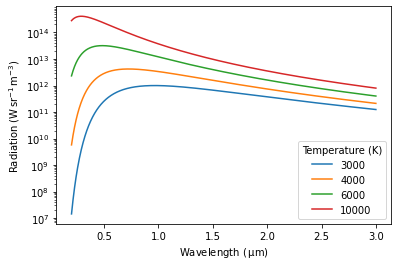

In [5]:
import matplotlib.pyplot as plt
import numpy as np

kB = 1.380649e-23 # J /K
h = 6.62607015e-34 # J s
c = 299792458.0 # m / s

def planck(l, T):
    A = 2 * h * c**2 / l**5
    B = A / (np.exp(h * c / (kB * T * l)) - 1.0)
    return B

l_um = np.linspace(0.2, 3, 1000) # comprimento de onda en micrômetros
l_m = l_um * 1e-6 # comprimento de onda em metros

fig, ax = plt.subplots(nrows=1, ncols=1)

ax.set_yscale('log')

temperatures = (3000,4000,6000,10000)

for T in temperatures:
    B = planck(l_m, T)
    ax.plot(l_um,B)

ax.set_xlabel('Wavelength ($\,\mathrm{\mu m}$)')  
ax.set_ylabel('Radiation ($\mathrm{W}\,\mathrm{sr}^{-1}\,\mathrm{m}^{-3}$)')
ax.legend(temperatures,title='Temperature (K)')
plt.show()